# **Not an ideal network**

1.   Install Keras [Keras is a high-level neural networks API]
2.   Import Keras

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


1. import the basic libraries
2. import libraries required for building up the model using keras
3. import the mnist dataset


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

1. Load data from mnist dataset and split the data between training dataset and testing dataset

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


1. Print the shape for the trainig dataset
2. Import pyplot for plotting the input image
3. Plot the Input Image

(60000, 28, 28)


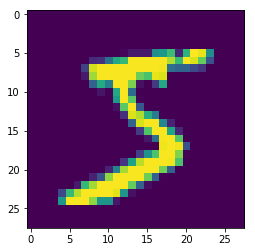

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

1. Reshape the training dateset to 28*28 size with 1 channel.
2. Reshape the testing dateset to 28*28 size with 1 channel.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

1. Convert the input data type to float32.
2. Normalise the input data within the range of 0 and 9.

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

1. Print the y train first 10 values

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

1. Convert the 1D class arrays of output data into 10 dimesional class matrices - basically one hot encoding.

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

1. Print the y train first 10 values

In [0]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In the following steps we would be preparing our model using Keras:
1. Import **Activation** and **MaxPool2D** layers from Keras
2. We are are **Sequential** Mode for preparing our Deep Neural Network Model
3. We first add 3 **convolution 2D** layers increading the number of kernerls with each layer and first layer has the input dimension of 28X28X1 and activation function used is relu.
4. Then we add **MaxPooling2D** layer of size 2X2
5. Then we add 5 **convolution 2D** layers again with increasing number of kernels, and relu activation function.
6. Then we add a **flatten layer** to flatten the output from pervious layers into 1D array.
7. Then we apply **SOFTMAX** layer which gives us probability distribution of the 10 output classes.


In [0]:
from keras.layers import Activation, MaxPooling2D
########################################
model = Sequential() 
########################################
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
# receptive field - 3X3, input channel dimensions - 28X28X1


model.add(Convolution2D(64, 3, 3, activation='relu'))
# receptive field - 5X5, input channel dimensions - 26X26X32


model.add(Convolution2D(128, 3, 3, activation='relu'))
# receptive field - 6X6, input channel dimensions - 24X24X64

########################################
model.add(MaxPooling2D(pool_size=(2, 2)))
# receptive field - 12X12, input channel dimensions - 22X22X64

########################################

model.add(Convolution2D(256, 3, 3, activation='relu'))
# receptive field - 14X14, input channel dimensions - 11X11X128

model.add(Convolution2D(512, 3, 3, activation='relu'))
# receptive field - 16X16, input channel dimensions - 9X9X256

model.add(Convolution2D(1024, 3, 3, activation='relu'))
# receptive field - 18X18, input channel dimensions - 7X7X512

model.add(Convolution2D(2048, 3, 3, activation='relu'))
# receptive field - 20X20, input channel dimensions - 5X5X1024

model.add(Convolution2D(10, 3, 3, activation='relu'))
# receptive field - 22X22, input channel dimensions - 3X3X2048

########################################

model.add(Flatten())
# receptive field - 22X22, input channel dimensions - 1X1X10

model.add(Activation('softmax'))
# receptive field - 22X22, input channel dimensions - 10

########################################
model.summary()
########################################

W0728 16:38:23.367254 140690481764224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
W0728 16:38:23.419959 140690481764224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0728 16:38:23.430298 140690481764224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launc

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 1024)        4719616   
__________

1. Compile the Model - Which will configures the model for training.
2. We will use:
*   Loss Function - categorical_crossentropy
*   Optimiser - Adam
*   Metrics - Accuracy



In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

W0728 16:38:37.581596 140690481764224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0728 16:38:37.630888 140690481764224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



1. FIT - Trains the model for a given number of epochs (iterations on a dataset)
2. Batch Size used = 8 
3. Number of epochs = 10

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0728 16:38:45.323091 140690481764224 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0728 16:38:45.441316 140690481764224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
60000/60000 [==============================] - 228s 4ms/step - loss: 2.3028 - acc: 0.0988
Epoch 2/10
60000/60000 [==============================] - 220s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 3/10
60000/60000 [==============================] - 220s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 4/10
60000/60000 [==============================] - 221s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 5/10
60000/60000 [==============================] - 221s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 6/10
60000/60000 [==============================] - 221s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 7/10
60000/60000 [==============================] - 221s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 8/10
60000/60000 [==============================] - 220s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 220s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 10/10
60000/60000 [==============================] - 219s 4ms/step - loss: 2.3026 - a

1. Use model.evaluate - Returns the loss value & metrics values for the model in test mode.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

1. Print the test loss value & metrics values for the model trained.

In [0]:
print(score)

[2.3025851249694824, 0.098]


1. Use the model to predict probalility distribition of the 10 classes.

In [0]:
y_pred = model.predict(X_test)

1. Print the predicted values by the model for the test data.
2. Print the actual value target value of the test data.

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[7 2 1 0 4 1 4 9 5]


**what all is wrong with the network?**
1. The maximum receptive field for our model is 22X22 and the image size is 28X28, so we need to add as many layers are required to reach the final receptive field equal to the size of the object, and in our case it is not true.
2. We are adding an increasing number of kernels due to which it increases load on main memory for the system, so somhow we need to reduce number of kernels used.
3. Our model is not able to predict the output class properly.
